In [1]:
import numpy as np
import tensorflow as tf

In [2]:
corpus_raw ="He is the king . The king is royal . She is the royal  queen"

In [3]:
# Convert to lower case
corpus_raw = corpus_raw.lower()

In [5]:
words = []
for word in corpus_raw.split():
    if word != ".": # we need remove "."
        words.append(word)
words = set(words) # We create dictionary so remove duplicate word

word2int = {}
int2word = {}
vocab_size = len(words)
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [6]:
print(word2int["king"])

4


In [7]:
print(int2word[4])

king


In [9]:
# Raw sentence as list 
raw_sentence = corpus_raw.split(".")

In [12]:
sentences = []
for sentence in raw_sentence:
    sentences.append(sentence.split())

In [13]:
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [14]:
# Generate training data
data = []
Window_size = 2
for sentence in sentences :
    for word_index,word in enumerate(sentence):
        for nb_word in sentence[max(word_index - Window_size,0): min(word_index+ Window_size,len(sentence)) +1 ]:
            if nb_word != word :
                data.append([word,nb_word])

In [15]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [16]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [17]:
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

In [19]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [20]:
x_train

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,

In [21]:
y_train

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,

In [25]:
print(x_train.shape)

(34, 7)


In [26]:
# placeholder
X = tf.placeholder(tf.float32,[None,7])
Y = tf.placeholder(tf.float32,[None,7])

In [28]:
# variable hiden 1
W1 = tf.Variable(tf.random_normal([7,5]))
b1 = tf.Variable(tf.constant(0.1,shape =[5]))
hiden_1 = tf.matmul(X,W1) + b1

In [29]:
# variable hiden 2
W2 = tf.Variable(tf.random_normal([5,7]))
b2 = tf.Variable(tf.constant(0.1,shape = [7]))
hiden_2 = tf.matmul(hiden_1,W2) + b2

In [30]:
# loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y,logits=hiden_2))

In [32]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [33]:
# initializer
init = tf.global_variables_initializer()


In [44]:
sess = tf.Session()
sess.run(init)
for i in range(1000):
    sess.run(optimizer,feed_dict={X:x_train,Y:y_train})
predict = tf.equal(tf.arg_max(hiden_2,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(predict,tf.float32))
print(sess.run(accuracy,feed_dict={X:x_train,Y:y_train}))
print(sess.run(cross_entropy,feed_dict={X:x_train,Y:y_train}))

0.235294
1.7096


In [45]:
print(sess.run(W1))

[[ 0.01958227 -0.13184541 -0.90213287 -0.56716734  0.8208366 ]
 [ 0.87104267  1.35505605 -0.96144599 -0.37160841  0.8487801 ]
 [-0.25192827  0.27459705 -0.28976816  0.79217947  0.67895919]
 [-0.08619474  2.23241997  0.34758687  0.5944764   0.0489247 ]
 [ 0.72465742 -0.37924507  0.40199515 -0.76181579  0.17949352]
 [ 0.13059877 -0.72706902 -0.59972697 -0.21868251  0.29057246]
 [-0.47785416 -1.0059948  -0.23733111 -0.13084926  0.44342482]]


In [55]:
vector = W1 + b1
vector= sess.run(vector)

In [49]:
from sklearn.manifold import TSNE


In [56]:
model = TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vector)

In [62]:
from sklearn.preprocessing import Normalizer

In [65]:
normal = Normalizer()
vector_normal = normal.fit_transform(vectors,"l2")

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

is 0.22343425865
queen 0.915279800966
royal -0.459494161508
he -0.151896011367
king 0.976134338528
the 0.994751378947
she 0.162385963001


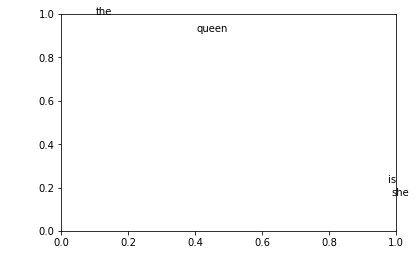

In [67]:
fig ,ax = plt.subplots()
for word in words:
    print(word, vector_normal[word2int[word]][1])
    ax.annotate(word, (vector_normal[word2int[word]][0],vector_normal[word2int[word]][1] ))